#### Import Packages and Modules
-----

In [37]:
%cd /content/drive/MyDrive/ML-Hackathon/dataset
import pandas as pd
import csv
import numpy as np
import gc
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec as w2v

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA

import string

/content/drive/MyDrive/ML-Hackathon/dataset


#### Reading Train Dataset Into A DataFrame

---

In [62]:
df = pd.read_csv("train.csv")
df

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000
...,...,...,...,...,...,...
2249693,2422167,Nike Women's As W Ny Df Swsh Hn Kh Bra (CZ7610...,Material : Polyester,NaN,3009,1181.100000
2249694,2766635,"(3PCS) Goose Game Cute Cartoon Enamel Pins, Fu...",[❤ [Inspiration] Inspired by the Untitled Goos...,<p><b>[Brand]: </b>XVIEONR</p> <p><br></p> <p>...,3413,125.984252
2249695,1987786,Kangroo Sweep Movement Printed Wooden Wall Clo...,"[Dial size: 12 inches in diameter,Big, clear r...",Wall Clocks Are Very Attractive In Looks And E...,1574,1200.000000
2249696,1165754,Electro Voice EKX-BRKT15 | Wall Mount Bracket ...,NaN,NaN,592,2900.000000


In [3]:
df = pd.read_csv("preprocessed_file.csv")
df

,TITLE,PRODUCT_LENGTH
0,"['artzfolio', 'tulip', 'flowers', 'blackout', ...",2125.980000
1,"['marks', 'spencer', 'girls', 'pyjama', 'sets'...",393.700000
2,"['priknik', 'horn', 'red', 'electric', 'air', ...",748.031495
3,"['alishah', 'womens', 'cotton', 'ankle', 'leng...",787.401574
4,"['united', 'empire', 'loyalists', 'chronicle',...",598.424000
...,...,...
2249681,"['nike', 'womens', 'w', 'ny', 'df', 'swsh', 'h...",1181.100000
2249682,"['3pcs', 'goose', 'game', 'cute', 'cartoon', '...",125.984252
2249683,"['kangroo', 'sweep', 'movement', 'printed', 'w...",1200.000000
2249684,"['electro', 'voice', 'ekxbrkt15', 'wall', 'mou...",2900.000000


#### Calculating Missing Data Per Attribute

---

In [ ]:
df.isna().sum()

PRODUCT_ID               0
TITLE                   12
BULLET_POINTS       837364
DESCRIPTION        1157381
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

#### Removing Rows Without Title And Dropping Attributes

---



In [ ]:
df.dropna(subset=['TITLE'], inplace=True)
df.drop(['PRODUCT_ID','PRODUCT_TYPE_ID','BULLET_POINTS','DESCRIPTION'], axis=1, inplace=True)
df.isna().sum()

TITLE             0
PRODUCT_LENGTH    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2249686 entries, 0 to 2249697
Data columns (total 2 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TITLE           object 
 1   PRODUCT_LENGTH  float64
dtypes: float64(1), object(1)
memory usage: 51.5+ MB


#### Pre-Processing Title Attribute Of Train Data

---

In [ ]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
# Remove punctuation and convert to lowercase
df['TITLE'] = df['TITLE'].apply(lambda x: str(x))
df['TITLE'] = df['TITLE'].apply(lambda x: x.lower())
df['TITLE'] = df['TITLE'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
stop_words = set(stopwords.words('english'))
df['TITLE'] = df['TITLE'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

print(df['TITLE'][0])
df.to_csv("preprocessed_file.csv", index=False)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['artzfolio', 'tulip', 'flowers', 'blackout', 'curtain', 'door', 'window', 'room', 'eyelets', 'tie', 'back', 'canvas', 'fabric', 'width', '45feet', '54inch', 'height', '5', 'feet', '60', 'inch', 'set', '2', 'pcs']


In [ ]:
listofsentences = []
for title in df['TITLE']:
  listofsentences.append(title)
print(listofsentences[0])

['artzfolio', 'tulip', 'flowers', 'blackout', 'curtain', 'door', 'window', 'room', 'eyelets', 'tie', 'back', 'canvas', 'fabric', 'width', '45feet', '54inch', 'height', '5', 'feet', '60', 'inch', 'set', '2', 'pcs']


#### Vectorization Of Words Using Word2Vec

---

In [ ]:
w = w2v(
    listofsentences,
    min_count=3,  
    sg = 1,       
    window=7      
)       

In [ ]:
w = w2v.load("vector.model")

In [ ]:
emb_df = (
    pd.DataFrame(
        [w.wv.get_vector(str(n)) for n in w.wv.key_to_index],
        index = w.wv.key_to_index
    )
)
print(emb_df.shape)
emb_df

(232437, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
cover,0.286108,-0.147746,0.164019,0.716033,-0.348755,-0.592243,0.045907,0.214283,-0.224594,-0.023390,...,-0.009313,-0.454135,0.039118,0.511408,0.659251,-0.870744,-0.395289,-0.218431,-0.144361,0.537030
black,-0.479553,0.364511,0.137299,0.197110,-0.099846,-0.385562,0.385461,0.574358,-0.285761,0.196879,...,-0.015991,-0.204827,-0.051453,-0.051176,0.382207,0.012298,-0.032480,-0.203995,-0.190675,0.299564
womens,-0.426212,0.270230,-0.176019,-0.189911,0.637242,-0.274511,0.473167,0.877195,-0.658636,-0.058928,...,-0.019016,0.302854,0.473390,-0.850989,1.467509,0.772137,-0.168589,-0.028723,0.232445,0.608046
x,0.092628,0.828355,0.304919,0.159915,0.254486,-0.331046,0.005327,0.742776,0.280541,-0.748928,...,0.292841,0.189699,-0.031771,0.163067,0.541736,0.028734,0.267482,-0.540151,-0.353636,-0.130208
case,0.293679,-0.307112,-0.527809,0.143519,0.241358,-0.250235,-0.135297,0.523004,-0.419158,-0.095937,...,0.118172,-0.684817,-0.475999,0.041793,1.208078,0.165967,0.299561,-0.283487,-0.150294,0.547056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tvxq,-0.059429,0.116505,0.194370,-0.020231,-0.003854,-0.169436,0.109025,0.208942,-0.048278,-0.050150,...,0.152735,-0.107590,0.184155,-0.083383,0.121897,-0.054185,0.158217,-0.099296,0.286688,0.149734
sockracer,-0.054342,0.202928,0.018701,-0.075234,-0.107355,-0.339324,0.229295,0.236623,0.020212,-0.151027,...,0.048934,-0.094057,0.259698,0.067603,0.297695,0.212157,0.055751,-0.106420,0.087704,0.114243
s31,-0.017590,0.042903,0.077044,0.016296,0.058059,-0.089442,0.064555,0.155169,-0.126106,0.057353,...,-0.120131,-0.229164,0.174202,-0.103729,0.108695,0.024467,0.072798,-0.206704,0.132970,0.076970
iena,0.008223,0.094516,0.114883,-0.194651,0.130200,-0.077121,0.101129,0.275467,-0.051067,-0.118677,...,0.092262,-0.200195,0.191261,-0.026498,0.164448,0.067116,0.230750,-0.161152,0.132160,-0.088682


#### Saving Vector Model

-----

In [ ]:
w.save("vector.model")

#### Saving Embedded Text

-----

In [ ]:
emb_df.to_csv("embedded_text.csv")

#### Testing Word Similarity

-----

In [ ]:
sim=w.wv.most_similar('phone')
print(sim[0][0])

cell


#### Training The Model

-----

In [5]:
from sklearn.linear_model import LinearRegression

w2v_model = w2v.load('vector.model')

# Convert text data to word2vec vectors
df['TITLE'] = df['TITLE'].apply(lambda text: np.mean([w2v_model.wv[word] for word in text if word in w2v_model.wv]))

In [15]:
df.shape

(2249686, 2)

In [16]:
df = df.dropna()
df

,TITLE,PRODUCT_LENGTH
0,0.006139,2125.980000
1,0.007353,393.700000
2,-0.000704,748.031495
3,0.010684,787.401574
4,-0.001014,598.424000
...,...,...
2249681,0.003508,1181.100000
2249682,0.005740,125.984252
2249683,0.005024,1200.000000
2249684,0.006164,2900.000000


In [17]:
df.shape

(2248698, 2)

In [18]:
# Convert product length data to float values
Y = df['PRODUCT_LENGTH'].astype(float)

#Convert mean vectors to float values
X = df['TITLE'].astype(float)

In [19]:
#Checking datatype of Series X
X.dtypes

dtype('float64')

In [20]:
#Checking for null values
np.where(np.isnan(X))

(array([], dtype=int64),)

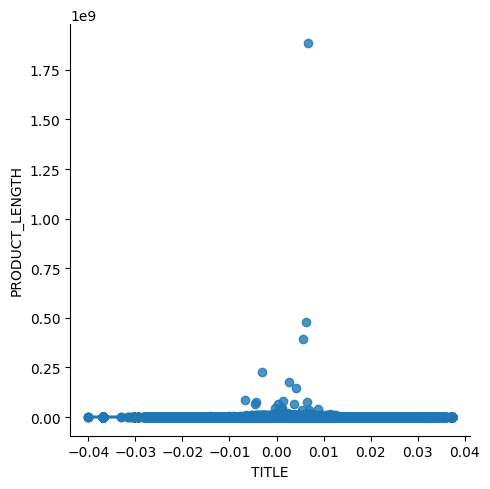

In [43]:
sns.lmplot(x ="TITLE", y ="PRODUCT_LENGTH", data = df, order = 2, ci = None)
plt.show()

In [36]:
# Create train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train model
regressor=LinearRegression()
X_train=X_train.values.reshape(-1,1)
X_val=X_val.values.reshape(-1,1)
regressor.fit(X_train,Y_train)
print(regressor.score(X_val,Y_val))

-0.00020613647513867406


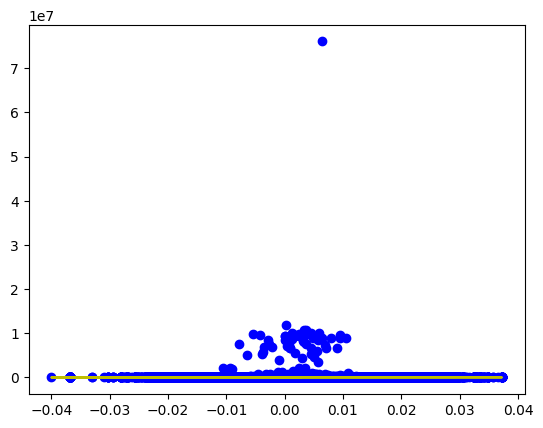

In [47]:
Y_pred = regressor.predict(X_val)
plt.scatter(X_val, Y_val, color ='b')

plt.plot(X_val, Y_pred, color ='y')

plt.show()

#### Saving The Prediction Model

-----

In [48]:
# Save model to file or use it to make predictions on new data
import joblib
filename = 'finalized_model_linear_regression.sav'
joblib.dump(regressor, filename)

['finalized_model_linear_regression.sav']

#### Reading Test Dataset Into A DataFrame

---

In [ ]:
test_df = pd.read_csv("test.csv")

In [69]:
test_df = pd.read_csv("preprocessed_test_file.csv")

In [ ]:
test_df.drop(['DESCRIPTION', 'BULLET_POINTS', 'PRODUCT_TYPE_ID'], axis=1, inplace=True)

In [50]:
test_df

,PRODUCT_ID,TITLE
0,604373,"['manuel', 'dhéliogravure', 'et', 'de', 'photo..."
1,1729783,"['dcgaring', 'microfiber', 'throw', 'blanket',..."
2,1871949,"['imatch', 'auto', 'parts', 'front', 'license'..."
3,1107571,"['pinmart', 'gold', 'plated', 'excellence', 's..."
4,624253,"['visual', 'mathematics', 'illustrated', 'ti92..."
...,...,...
734731,921419,"['casual', 'canine', 'basic', 'hoodie', 'dogs'..."
734732,2456362,"['dive', 'log', 'book', 'scuba', 'diving', 'lo..."
734733,841529,"['axor', '39135001', 'citterio', 'widespread',..."
734734,1190194,"['carolines', 'treasures', 'bb1801ds812', 'hal..."


#### Pre-Processing Title Attribute Of Test Data

---

In [ ]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
# Remove punctuation and convert to lowercase
test_df['TITLE'] = test_df['TITLE'].apply(lambda x: str(x))
test_df['TITLE'] = test_df['TITLE'].apply(lambda x: x.lower())
test_df['TITLE'] = test_df['TITLE'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
stop_words = set(stopwords.words('english'))
test_df['TITLE'] = test_df['TITLE'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

print(test_df['TITLE'][0])
test_df.to_csv("preprocessed_test_file.csv", index=False)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['manuel', 'dhéliogravure', 'et', 'de', 'photogravure', 'en', 'relief', 'éd1890', 'savoirs', 'et', 'traditions']


#### Vectorization Of Words In Test Data With Vector Model

---

In [70]:
w2v_model = w2v.load('vector.model')

test_df['TITLE'] = test_df['TITLE'].apply(lambda text: np.mean([w2v_model.wv[word] for word in text if word in w2v_model.wv]))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [71]:
test_df

,PRODUCT_ID,TITLE
0,604373,-0.005848
1,1729783,0.003132
2,1871949,0.002916
3,1107571,0.001794
4,624253,0.011317
...,...,...
734731,921419,0.000887
734732,2456362,-0.001326
734733,841529,-0.001064
734734,1190194,0.008372


In [72]:
test_df.shape

(734736, 2)

In [73]:
test_df = test_df.fillna(0)
test_df

,PRODUCT_ID,TITLE
0,604373,-0.005848
1,1729783,0.003132
2,1871949,0.002916
3,1107571,0.001794
4,624253,0.011317
...,...,...
734731,921419,0.000887
734732,2456362,-0.001326
734733,841529,-0.001064
734734,1190194,0.008372


In [74]:
test_df.shape

(734736, 2)

#### Predicting Product Length Value Using Prediction Model

---

In [75]:
import joblib
model = joblib.load('finalized_model_linear_regression.sav')
test_df['PRODUCT_LENGTH'] = model.predict(test_df['TITLE'].values.reshape(-1,1))

In [76]:
test_df

,PRODUCT_ID,TITLE,PRODUCT_LENGTH
0,604373,-0.005848,2723.907070
1,1729783,0.003132,4679.448390
2,1871949,0.002916,4632.393431
3,1107571,0.001794,4388.065714
4,624253,0.011317,6461.902901
...,...,...,...
734731,921419,0.000887,4190.454431
734732,2456362,-0.001326,3708.630699
734733,841529,-0.001064,3765.603833
734734,1190194,0.008372,5820.397803


In [77]:
test_df.drop(['TITLE'], axis=1, inplace=True)

In [78]:
test_df

,PRODUCT_ID,PRODUCT_LENGTH
0,604373,2723.907070
1,1729783,4679.448390
2,1871949,4632.393431
3,1107571,4388.065714
4,624253,6461.902901
...,...,...
734731,921419,4190.454431
734732,2456362,3708.630699
734733,841529,3765.603833
734734,1190194,5820.397803


#### Saving Final Prediction File

---

In [79]:
test_df.to_csv("FinalPredictions.csv")

#### MISC

---

In [ ]:
"""
# Split data into features and target
X = data[['PRODUCT_ID', 'TITLE', 'DESCRIPTION',
          'BULLET_POINTS', 'PRODUCT_TYPE_ID']]
y = data['PRODUCT_LENGTH']

# Preprocess data (e.g., clean data, extract features)

# Create train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print('MAE:', mae)
print('RMSE:', rmse)

# Deploy model
# Save model to file or use it to make predictions on new data
"""

"""
df=pd.read_csv('preprocessed_file_2.csv')
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer on the 'TITLE' column of the dataframe
#vectorizer.fit(df['TITLE'])

# Transform the 'TITLE' column of the dataframe into a bag-of-words matrix
bow_matrix = vectorizer.fit_transform(df['TITLE'])

# Convert the bag-of-words matrix into a pandas dataframe
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names())

# Concatenate the original dataframe with the bag-of-words dataframe
#df = pd.concat([df, bow_df], axis=1)

# Save the updated dataframe back to the CSV file
#bow_df.to_csv('preprocessed_file_2.csv', index=False)
"""

"""
X = df['TITLE']
Y = df['PRODUCT_LENGTH']
vectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = vectorizer.fit_transform(X)
tfidf_tokens = vectorizer.get_feature_names_out()
df = pd.concat([df,  tfidf_wm.toarray(), tfidf_tokens], axis=1)
print("\nTD-IDF Vectorizer\n")
df

# Train model

# Evaluate model
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
"""

"""
target_sentence = "DCGARING Microfiber Throw Blanket Warm Fuzzy Plush Fleece Blanket Twin Size Mandala Design Meditation Hippie Style Lightweight Warm Luxury Blanket Super Soft for Bed/Couch/Sofa 40x50"
sentences_similarity = np.zeros(len(listofwords))

vocab = list(w.wv.index_to_key)
target_sentence_words = [word for word in target_sentence.split() if word in vocab]
l = listofwords[:10]
for idx, sentence in enumerate(l):
  sentence_words = [w for w in sentence if w in vocab]
  sim = w.wv.n_similarity(target_sentence_words, sentence_words)
  sentences_similarity[idx] = sim

result = list(zip(sentences_similarity, listofwords))
result.sort(key=lambda item:item[0], reverse=True)
print("Target:", target_sentence)
print(result)
"""
#Text to Vec
"""
def text_to_vectors(text):
    words = text
    vectors = []
    for word in words:
        try:
            vectors.append(w2v_model.wv[word])
        except KeyError:
            pass
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(w2v_model.vector_size)
"""